<a href="https://colab.research.google.com/github/deSamedi/Junior-DA-testcase/blob/main/testcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd

# Часть 1. Работа с данными

In [102]:
df = pd.read_excel('https://github.com/deSamedi/Junior-DA-testcase/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5%20%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.xlsx?raw=true').dropna()
df.drop(['good (1)'], axis=1, inplace=True)
df

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1260.0,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,866.0,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,163.0,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1146.0,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,823.0,3.283940,4.39674063521296
...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,279.0,10.971214,4.857810387061303
225,greetings,2.0,Кластер 2,sapphire grounds,335.0,1.160626,3.642819729434763
226,greetings,3.0,Кластер 3,entire ethical speakers,1782.0,7.985910,6.003699268483375
227,greetings,3.0,Кластер 3,courtesy textiles diameter,84.0,0.509490,4.151198803764073


Удаление неформатных значений

In [103]:
df.dtypes

area             object
cluster         float64
cluster_name     object
keyword          object
count            object
x               float64
y                object
dtype: object

In [104]:
for index, row in df.iterrows():
    try:
      row['y'] = float(row['y'])
      row['count'] = float(row['count'])
    except:
      df.drop(index,inplace=True)

Цвета из цветовых палеток Tableu

In [105]:
import matplotlib.colors as mcolors
colors = np.array(list(mcolors.TABLEAU_COLORS.values()))
colors

array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], dtype='<U7')

Создание колонки color

In [106]:
color_column = pd.Series(dtype='object')

for area in df.area.unique():
  temp_df = df.where(df['area']==area).dropna(how='all')
  temp_df.drop_duplicates(subset=['keyword'])                                   #удаление дубликатов слов в рамках одной области

  np.random.shuffle(colors)                                                     #перемешивание цветов
  
  color_column = color_column.append(
      pd.Series(temp_df.apply(lambda row: colors[int(row.cluster)],axis=1))
      )                                                                         #цвет по номеру кластера 
  

Объединение с исходным датафреймом

In [107]:
df = df.merge(color_column.rename('color'), left_index=True, right_index=True)

Сортировка

In [108]:
df.sort_values(by=['area','cluster','cluster_name','count'],
               ascending=[True,True,True,False], inplace=True)

In [109]:
df

,area,cluster,cluster_name,keyword,count,x,y,color
106,ar\vr,0.0,Кластер 0,written conflict fabulous,1443.0,2.991167,7.106798807182176,#1f77b4
108,ar\vr,0.0,Кластер 0,reservations linking,751.0,10.195602,12.259495712252914,#1f77b4
107,ar\vr,0.0,Кластер 0,interfaces neutral,586.0,10.443533,13.809914970161072,#1f77b4
109,ar\vr,0.0,Кластер 0,committees parallel,173.0,6.735260,3.613982972088637,#1f77b4
110,ar\vr,1.0,Кластер 1,postcards looked republic detector,1397.0,10.474474,6.220011967033064,#17becf
...,...,...,...,...,...,...,...,...
100,worlds,2.0,Кластер 2,ringtone parental,471.0,11.723895,4.363994491947961,#17becf
102,worlds,2.0,Кластер 2,recipient traffic,236.0,5.593629,0.5533676310113189,#17becf
105,worlds,3.0,Кластер 3,immunology plates,1653.0,2.407028,7.65152738334079,#e377c2
103,worlds,3.0,Кластер 3,holdings herbal,1476.0,3.986508,10.906339823131932,#e377c2


In [110]:
df.to_excel('/content/drive/MyDrive/Junior DA test/Выходные данные.xlsx')

# Часть 2. Построение графиков

In [111]:
temp_df = df.where(df['area']=='worlds').dropna(how='all')
temp_df

,area,cluster,cluster_name,keyword,count,x,y,color
91,worlds,0.0,Кластер 0,harmful cultures,1866.0,4.786518,4.658916849525424,#8c564b
93,worlds,0.0,Кластер 0,island holland electric,1335.0,9.223316,14.683999423537758,#8c564b
94,worlds,0.0,Кластер 0,legends directive,1062.0,5.193632,3.4290455309766577,#8c564b
92,worlds,0.0,Кластер 0,covered harvest rights,973.0,0.162540,13.574503956024905,#8c564b
95,worlds,1.0,Кластер 1,retirement privilege pathology,1499.0,3.172261,2.7382208013485614,#ff7f0e
98,worlds,1.0,Кластер 1,notion scenario,1159.0,5.998013,9.48804687078874,#ff7f0e
97,worlds,1.0,Кластер 1,moderate command dublin,1050.0,8.155550,0.11438091958222096,#ff7f0e
101,worlds,2.0,Кластер 2,operating stevens,1382.0,11.535669,4.165848723252822,#17becf
100,worlds,2.0,Кластер 2,ringtone parental,471.0,11.723895,4.363994491947961,#17becf
102,worlds,2.0,Кластер 2,recipient traffic,236.0,5.593629,0.5533676310113189,#17becf


In [112]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from adjustText import adjust_text

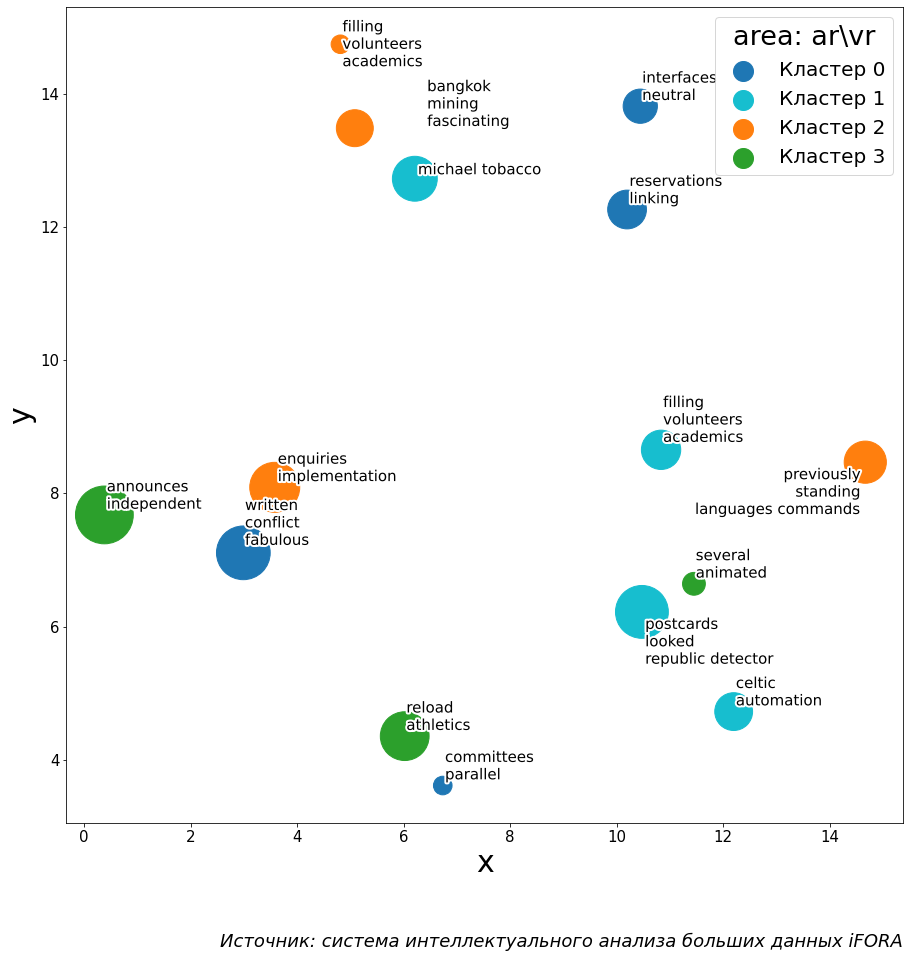

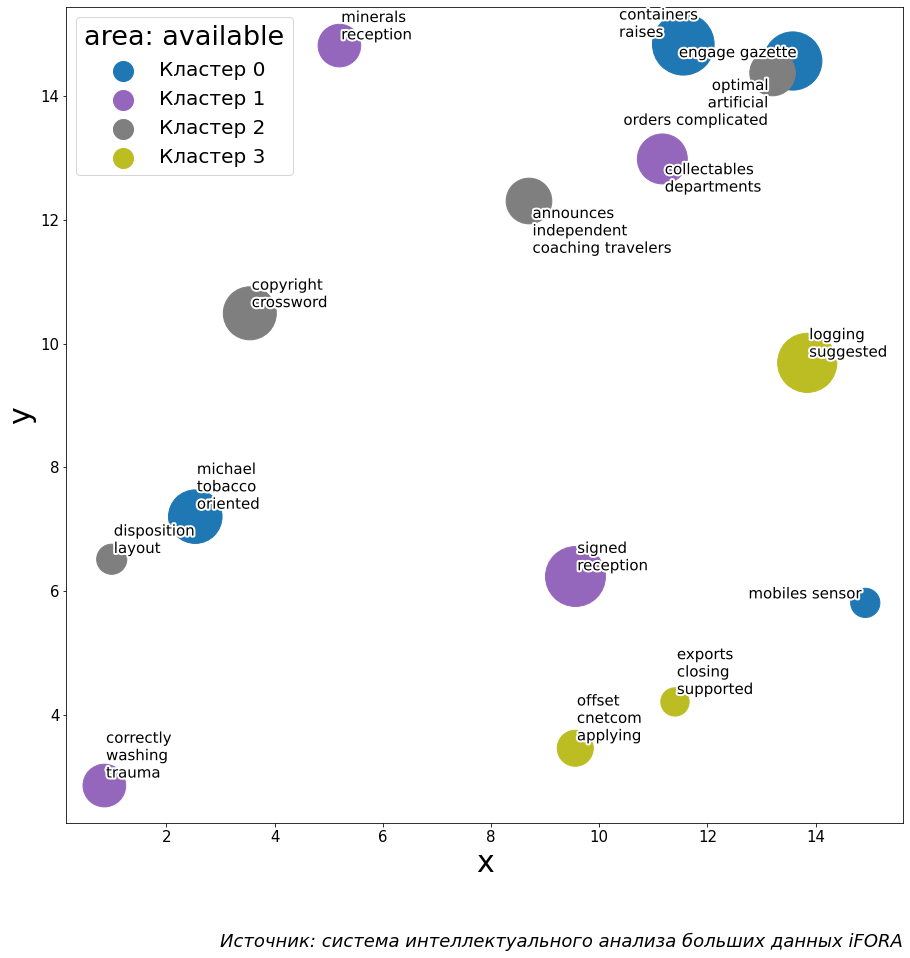

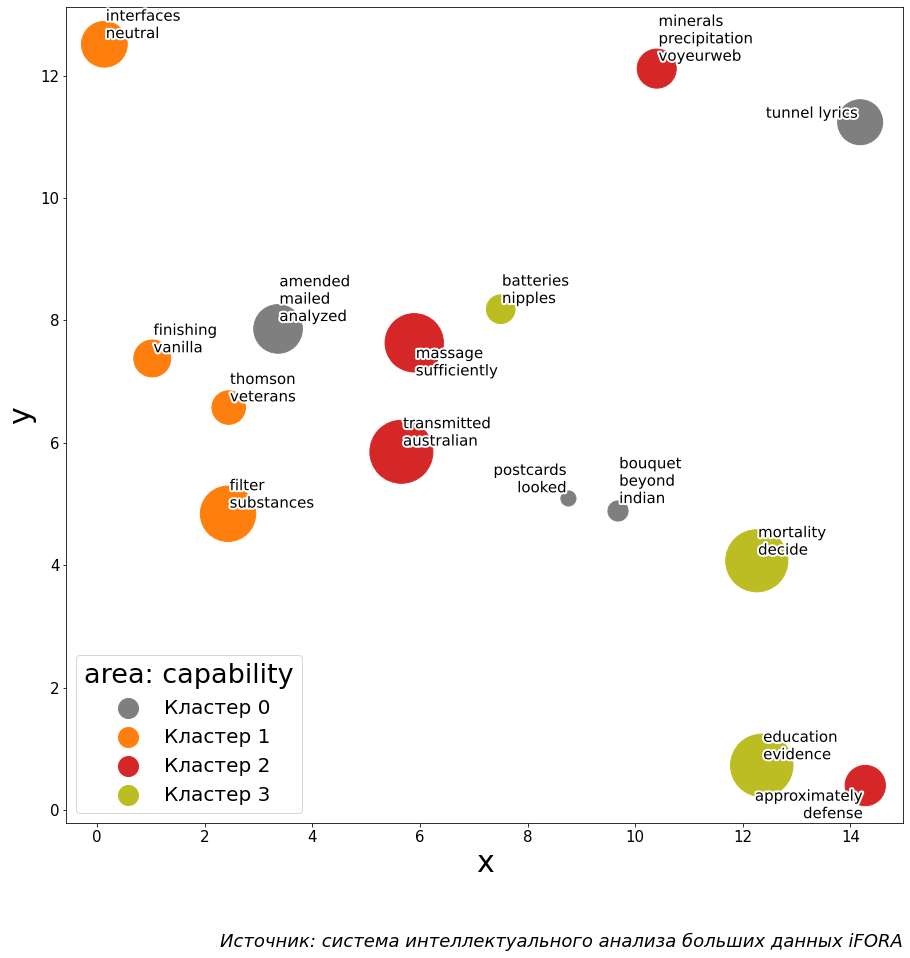

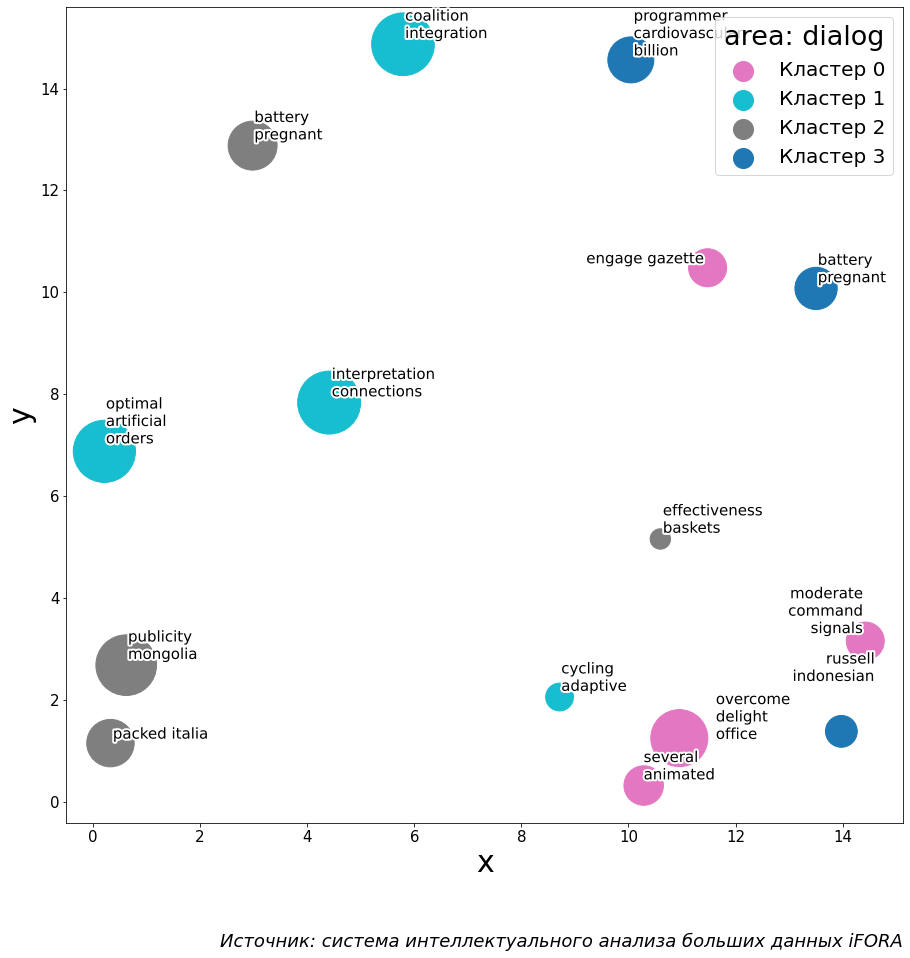

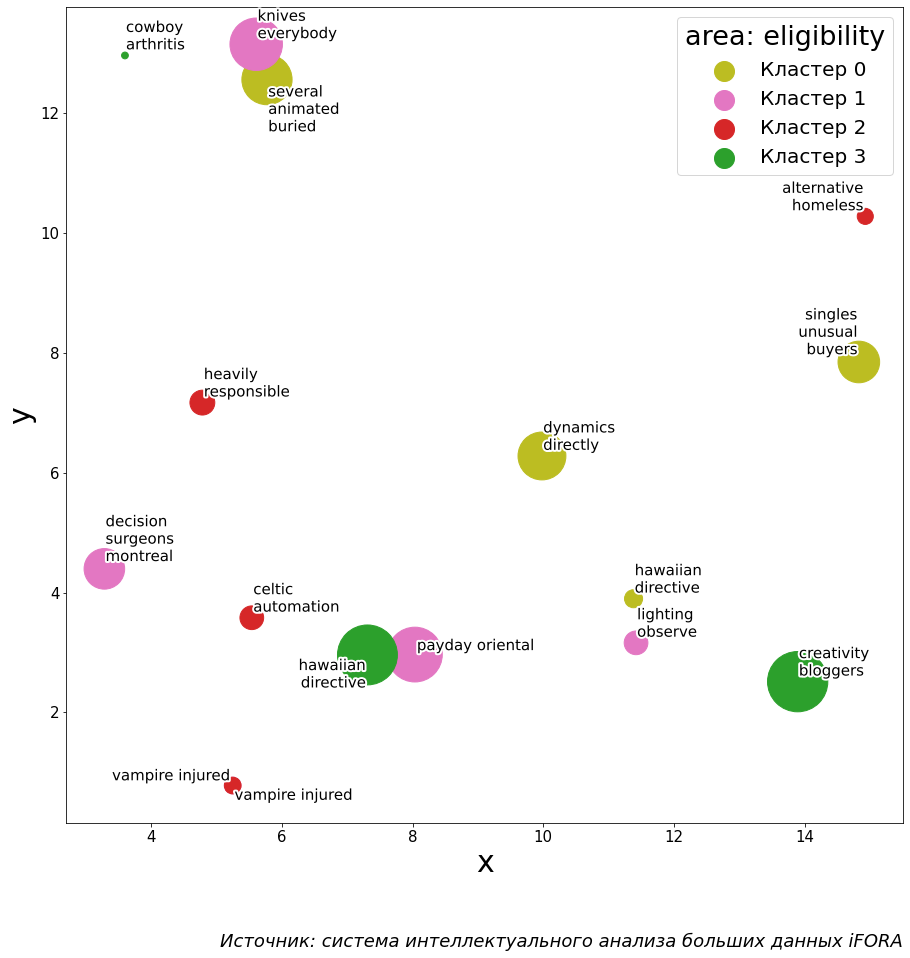

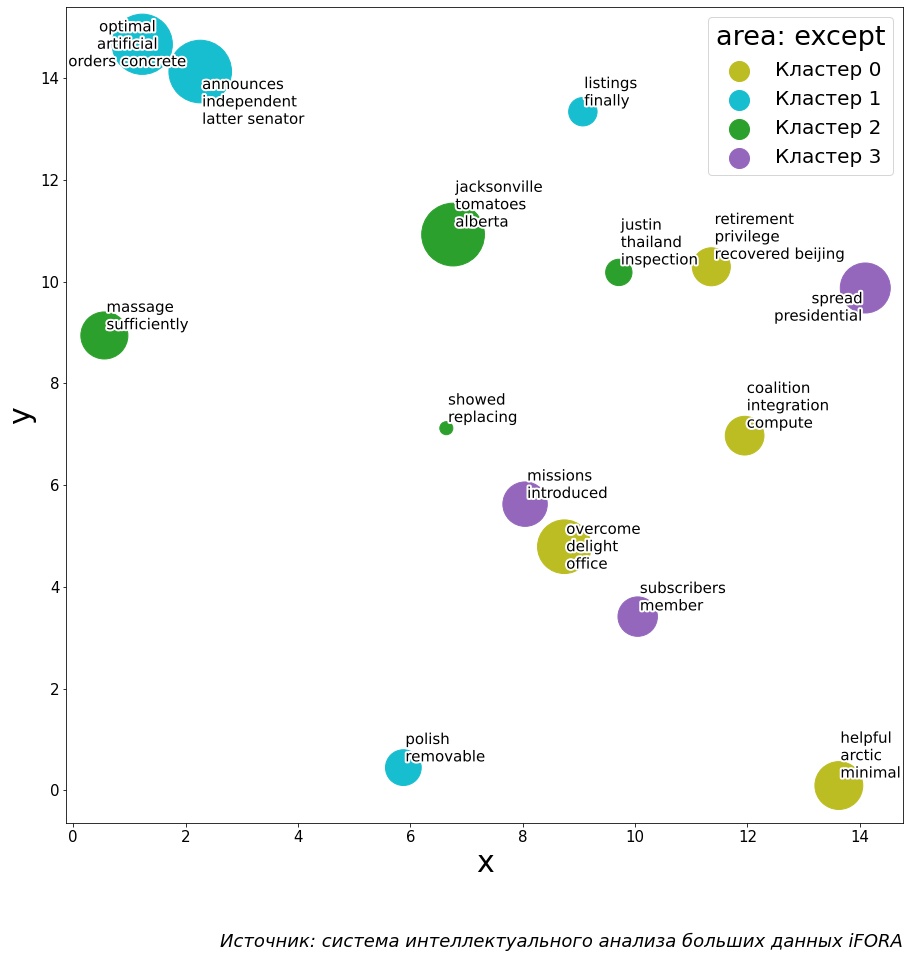

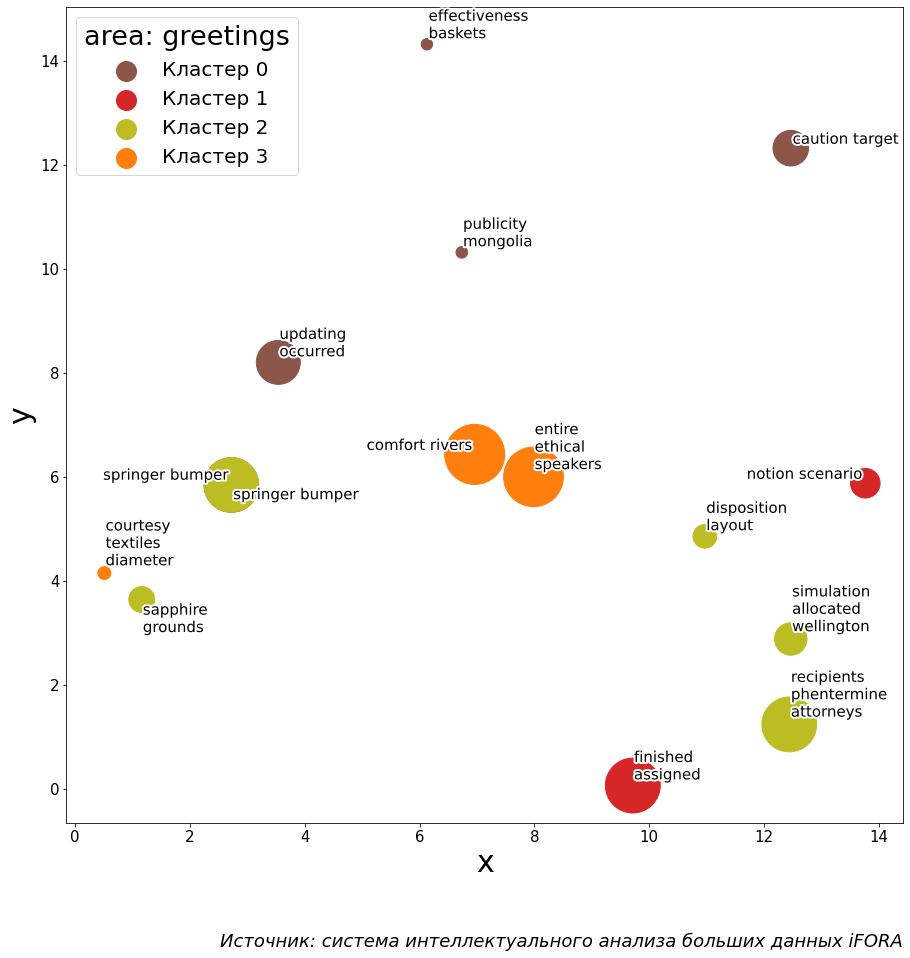

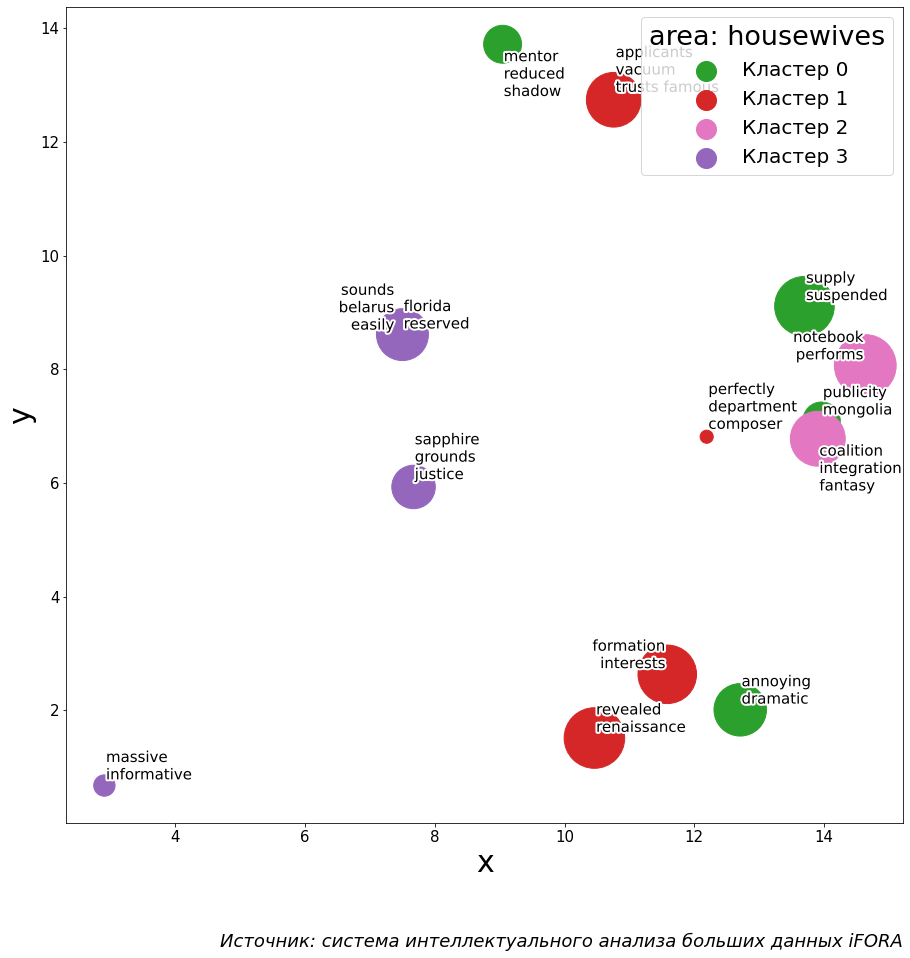

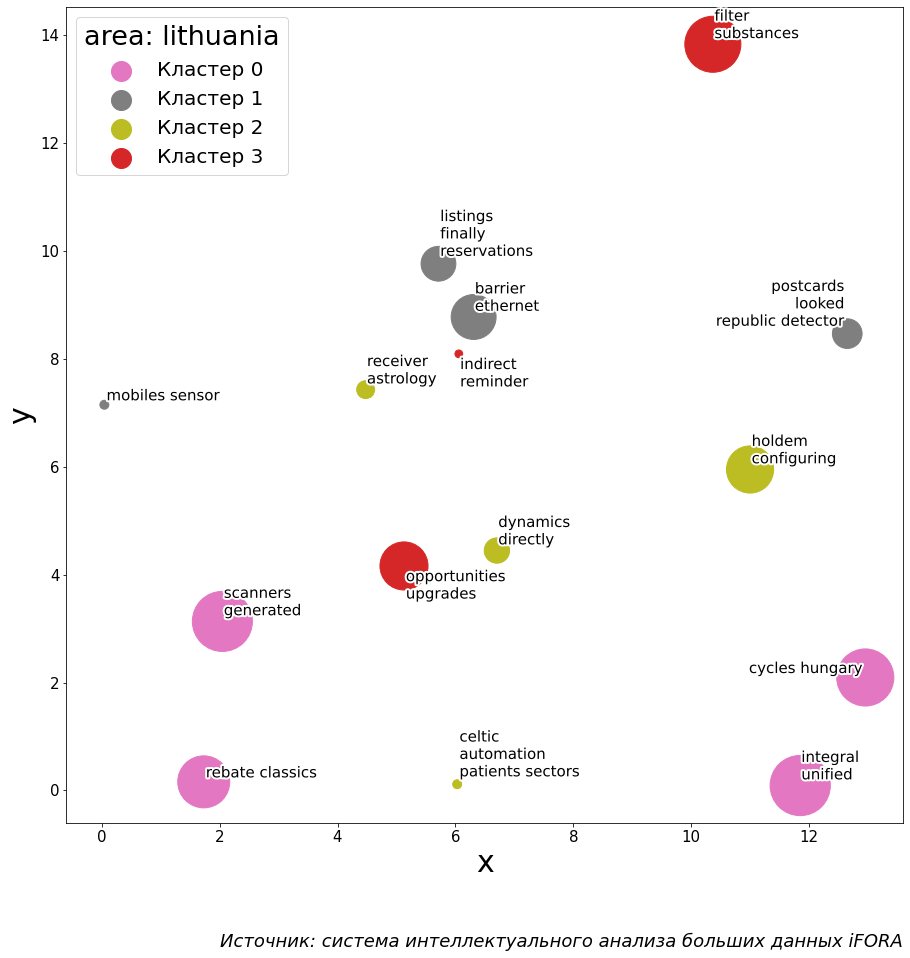

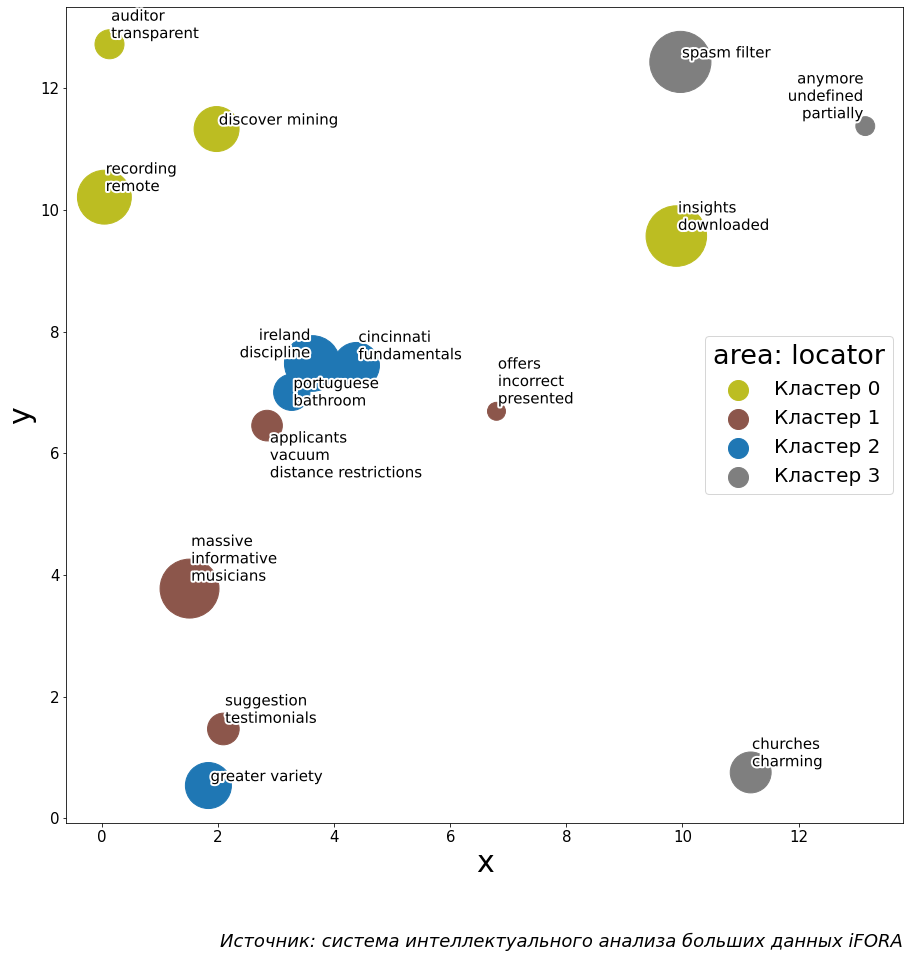

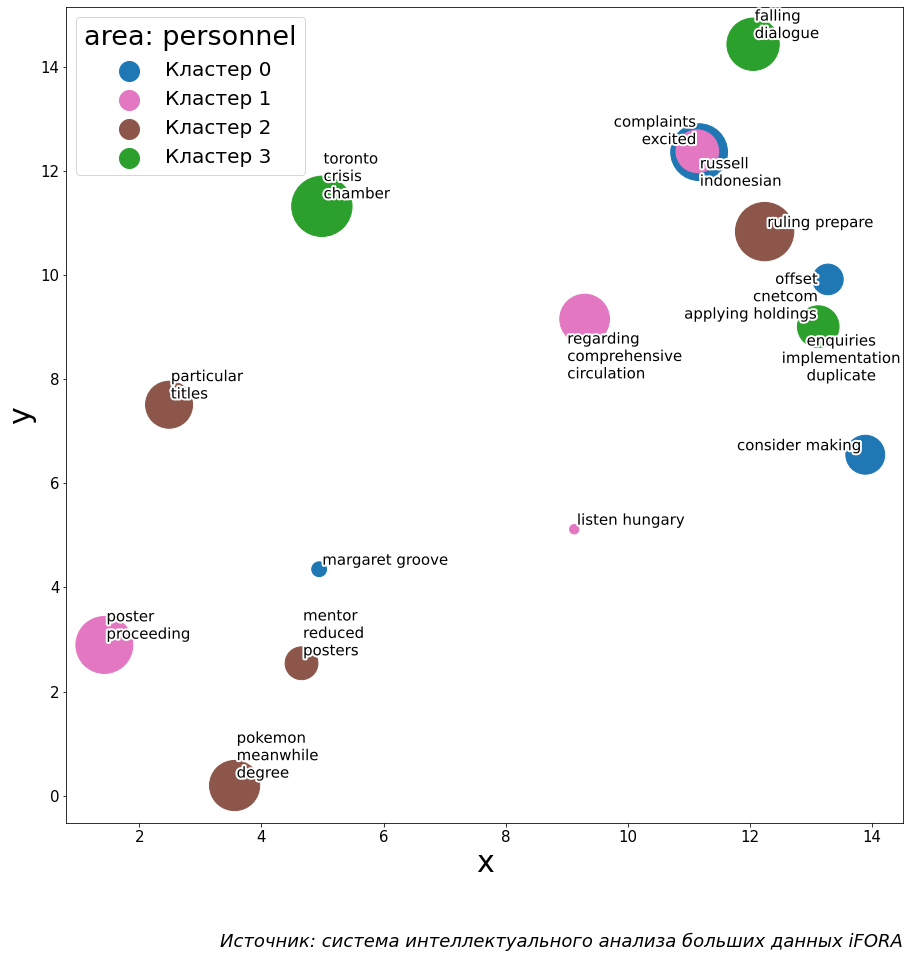

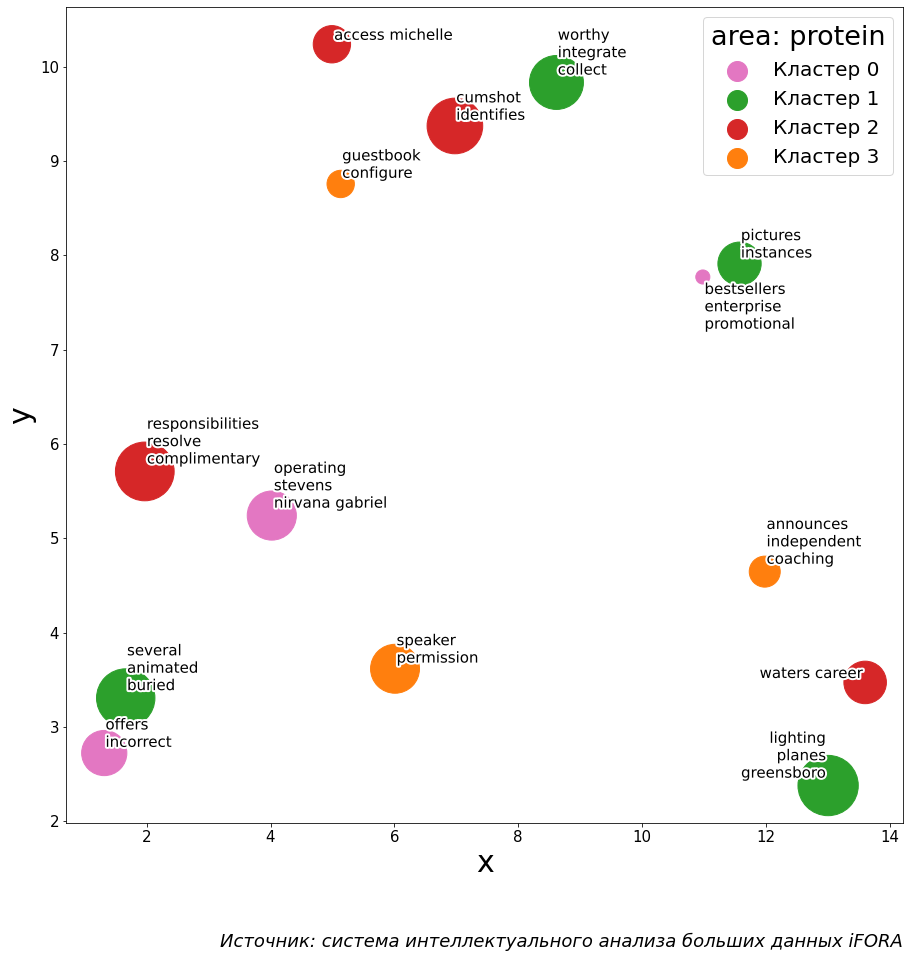

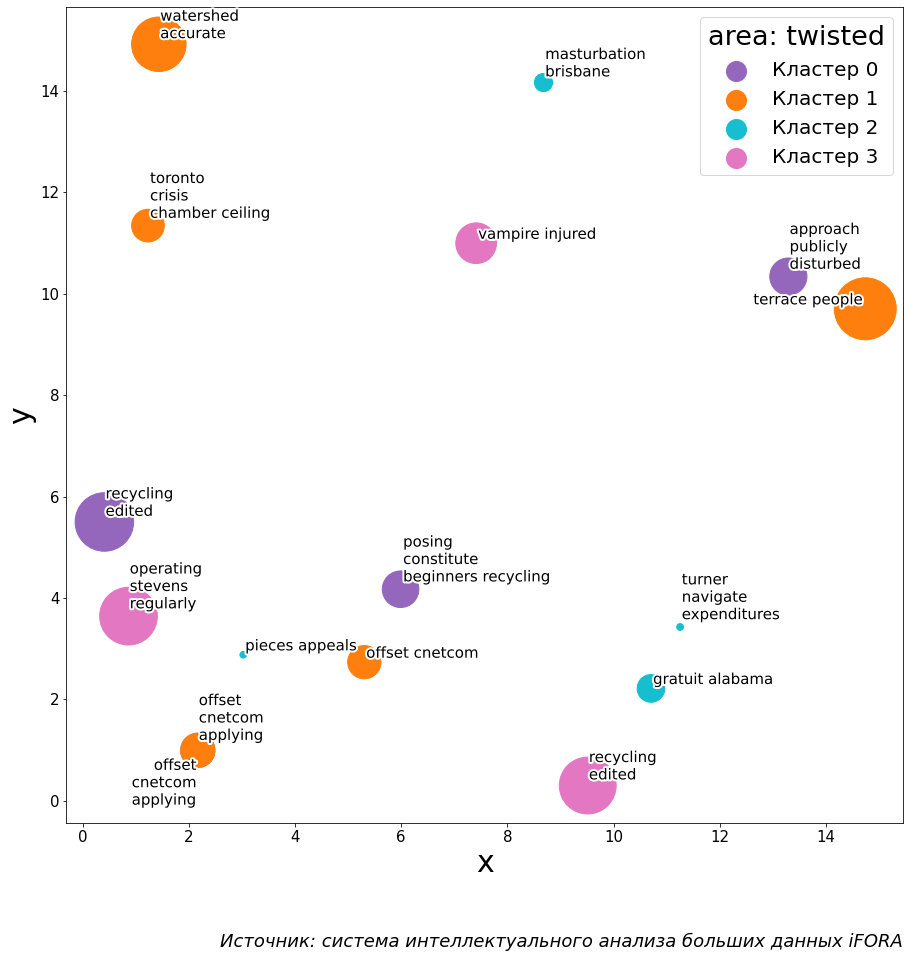

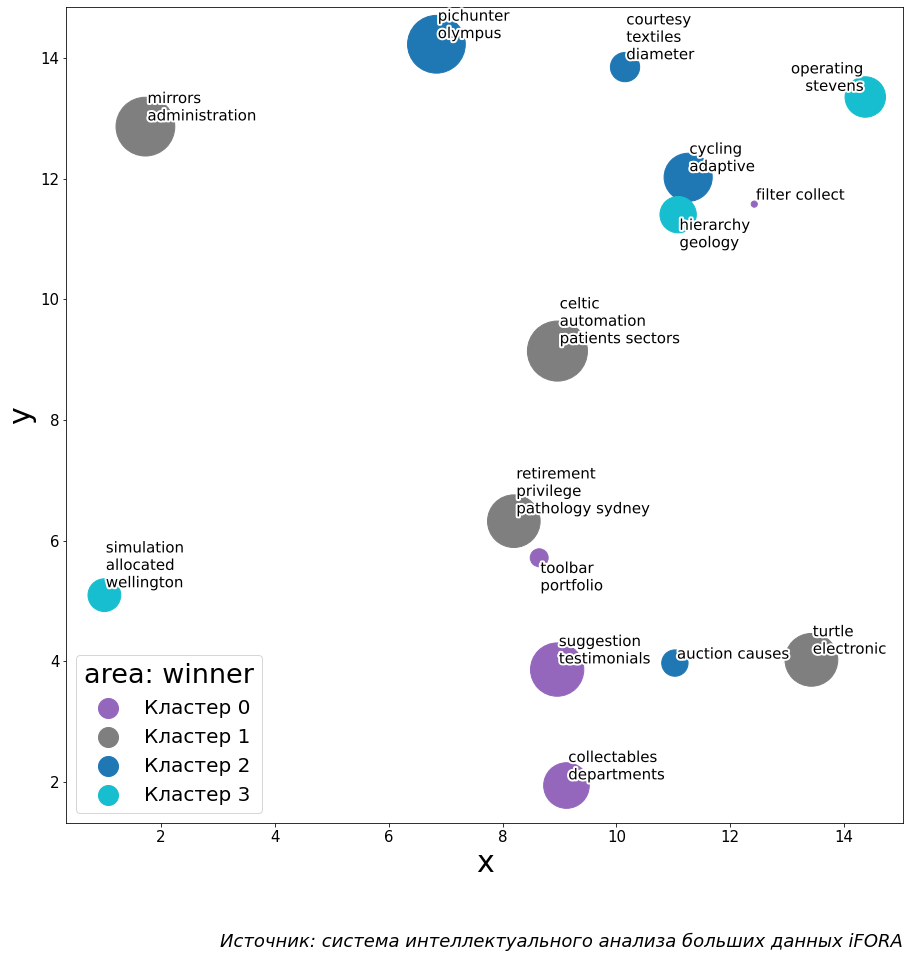

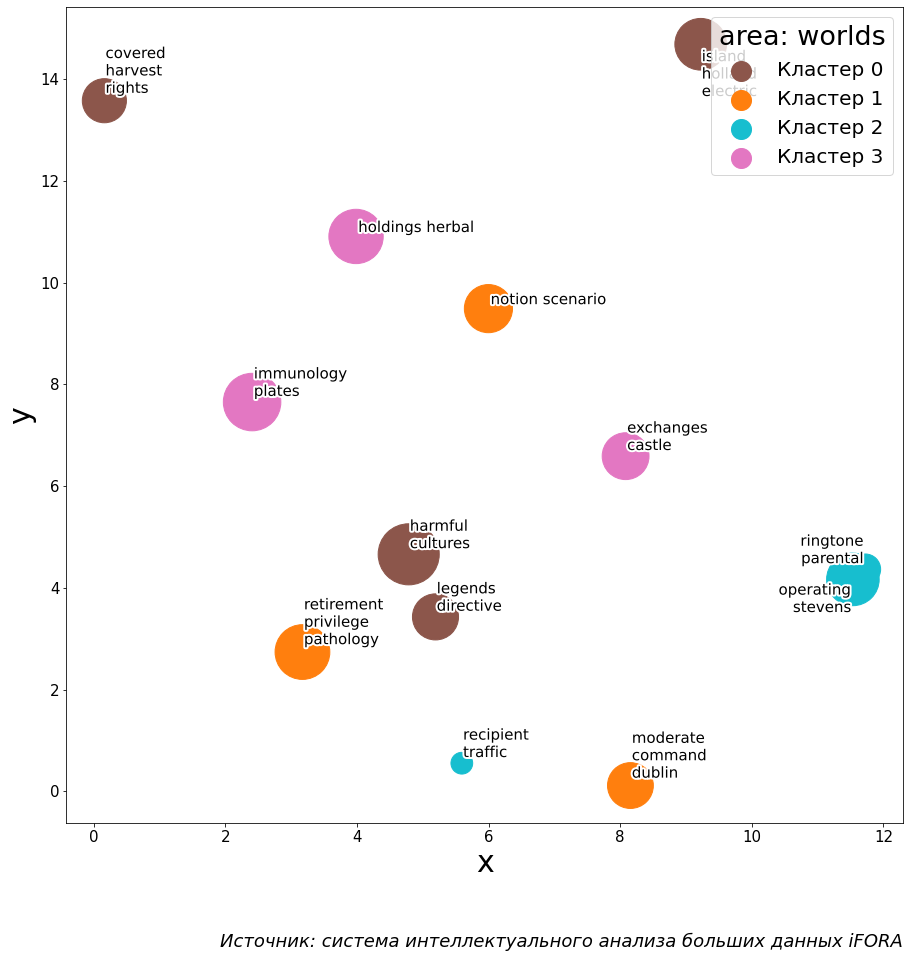

In [114]:
plt.rcParams.update({'font.size': 15})

for area in df.area.unique():
  plt.subplots(figsize=(15, 15))

  area_df = df.where(df['area']==area).dropna(how='all')

  #отрисовка кластеров
  for cluster_name in area_df.cluster_name.unique():
    cluster_df = area_df.where(area_df['cluster_name']==cluster_name).dropna(how='all')
    
    plt.scatter(x = cluster_df['x'], y = cluster_df['y'].astype(float),
               color=cluster_df['color'].sample(),label=cluster_name,
                s=2*cluster_df['count'].astype(float))
  
  #аннотации
  texts = []    
  for index, row in area_df.iterrows():

    if len(row['keyword'])>15:
      keyword = row['keyword'].replace(' ','\n',2)
    else:
      keyword = row['keyword']
    texts.append(plt.text(row['x'], float(row['y']), keyword, 
            ha='center', va='center',
              path_effects=[pe.withStroke(linewidth=4, foreground="white")]))

  adjust_text(texts)

  #легенда
  lgnd = plt.legend( scatterpoints=1, fontsize=20,title=f'area: {area}')
  plt.rcParams['legend.title_fontsize'] = 27
  lgnd.legendHandles[0]._sizes = [400]
  lgnd.legendHandles[1]._sizes = [400]
  lgnd.legendHandles[2]._sizes = [400]
  lgnd.legendHandles[3]._sizes = [400]

  #футер
  plt.figtext(0.9, 0.01, 
              'Источник: система интеллектуального анализа больших данных iFORA',
              ha="right", fontsize=18,fontstyle='italic')
  plt.xlabel("x",fontsize=30)
  plt.ylabel("y",fontsize=30)
  plt.savefig(f'/content/drive/MyDrive/Junior DA test/Диаграммы/{area}.png',dpi=100)
  plt.show()
